In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
transaction_data = pd.read_csv("transaction_data.csv")
purchase_data = pd.read_csv("purchase_behaviour.csv")

In [6]:
# Merge data on customer ID
merged_data = transaction_data.merge(purchase_data, on="LYLTY_CARD_NBR")

In [8]:
# Top 3 most profitable products
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)


In [10]:
# Most loyal customer segment
loyal_customers = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(1)
)


C:\Users\mdash\AppData\Local\Temp\ipykernel_31844\2215662855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products["PROD_NAME"], y=top_products["TOT_SALES"], palette="viridis")


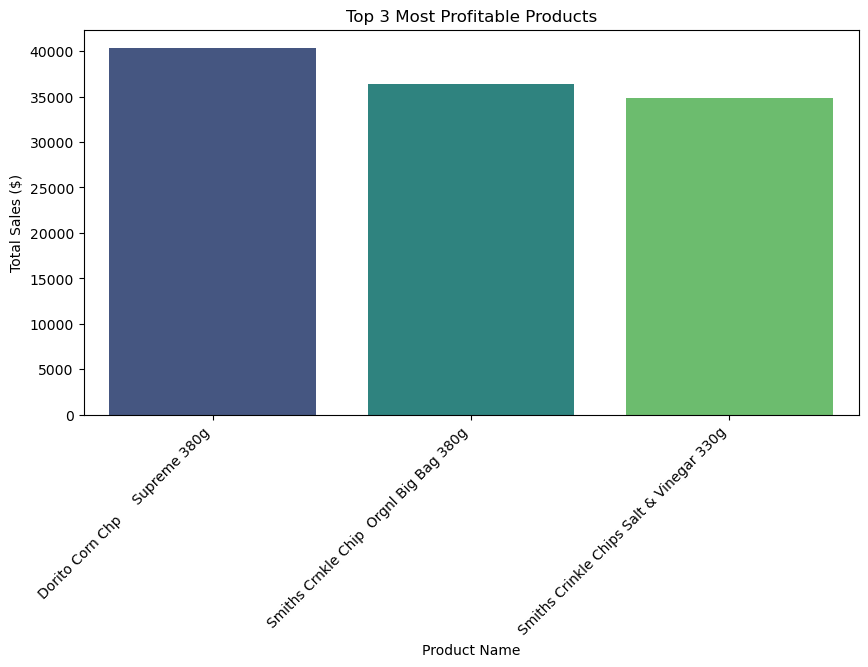

In [12]:
# Visualization of top products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products["PROD_NAME"], y=top_products["TOT_SALES"], palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.show()


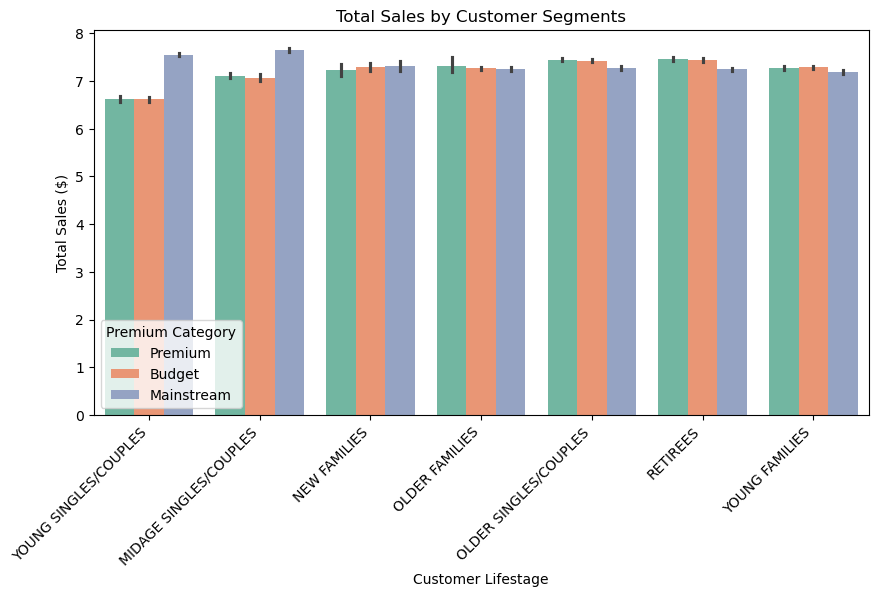

In [14]:
# Visualization of customer segments
plt.figure(figsize=(10, 5))
sns.barplot(x=merged_data["LIFESTAGE"], y=merged_data["TOT_SALES"], hue=merged_data["PREMIUM_CUSTOMER"], palette="Set2")
plt.title("Total Sales by Customer Segments")
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Premium Category")
plt.show()


In [16]:
# Save findings
print("Top 3 Most Profitable Products:")
print(top_products)
print("\nMost Loyal Customer Segment:")
print(loyal_customers)


Top 3 Most Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Most Loyal Customer Segment:
        LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6  OLDER FAMILIES           Budget  168363.25
